# Introduction to Data Science 
# Activity for Lecture 10: Linear Regression 1
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Name:

Email:

UID:


## Class exercise: amphetamine and appetite

Amphetamine is a drug that suppresses appetite. In a study of this effect, a pharmocologist randomly allocated 24 rats to three treatment groups to receive an injection of amphetamine at one of two dosage levels (2.5 mg/kg or 5.0 mg/kg), or an injection of saline solution (0 mg/kg). She measured the amount of food consumed by each animal (in gm/kg) in the 3-hour period following injection. The results (gm of food consumed per kg of body weight) are shown below.


In [2]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm     
from sklearn import linear_model
from scipy.stats import probplot

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Experiment results:
data = pd.read_csv('FoodConsumption.csv')
data

,Dosage,Food Consumption
0,0.0,112.6
1,0.0,102.1
2,0.0,90.2
3,0.0,81.5
4,0.0,105.6
5,0.0,93.0
6,0.0,106.6
7,0.0,108.3
8,2.5,73.3
9,2.5,84.8


## Activity 1: Scatterplot and Linear Regression

**Exercise:** Make a scatter plot with dose as the $x$-variable and food consumption as the $y$ variable. Then run a linear regression on the data using the 'ols' function from the statsmodels python library to relate the variables by 

$$
\text{Food Consumption} = \beta_0 + \beta_1 \text{Dosage}. 
$$

What is the resulting linear equation? What is the $R^2$ value? Do you think the variables have a strong linear relationship? Add the line to your scatter plot.


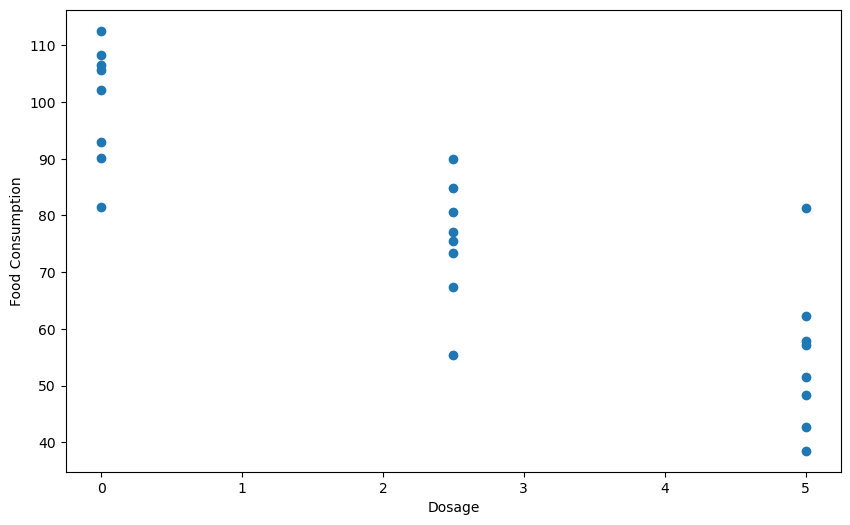

In [3]:
# your code goes here
plt.scatter(x = data['Dosage'], y = data['Food Consumption'])
plt.xlabel('Dosage')
plt.ylabel('Food Consumption')
plt.show()

In [16]:
# note for the formula we wrap 'Food Consumption' with the Q function because of the space between Food and Consumption
dosage_consumption_ols = sm.ols(formula="Q('Food Consumption') ~ Dosage", data=data).fit()
dosage_consumption_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('Food Consumption')   R-squared:                       0.739
Model:                               OLS   Adj. R-squared:                  0.728
Method:                    Least Squares   F-statistic:                     62.41
Date:                   Sat, 07 Feb 2026   Prob (F-statistic):           7.27e-08
Time:                           20:27:52   Log-Likelihood:                -91.420
No. Observations:                     24   AIC:                             186.8
Df Residuals:                         22   BIC:                             189.2
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.3313      3.680     26.994      0.000      91.700     106.963
Dosage        -9.0075      1.140     -7.900      0.000     -11.372      -6.643
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.052
Skew:                           0.114   Prob(JB):                        0.974
Kurtosis:                       3.012   Cond. No.                         5.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Your answer goes here:**

In the least squares fit the resulting linear equation is

$$
\text{Food Consumption} = 99.33 - 9.01 * \text{Dosage}. 
$$

The $R^2$ value is observed to be $0.739$, which is relatively close to one. Since the slope coefficient is quite far from zero, and the p-value is also very close to zero, it indicates a strong linear relationship between variables.


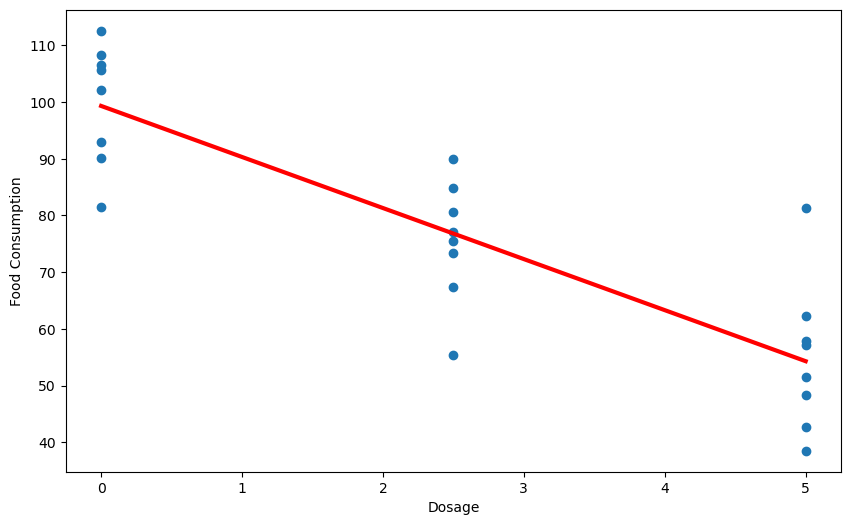

In [22]:
# scatter plot together with the best fit line
plt.scatter(x = data['Dosage'], y = data['Food Consumption'])
plt.plot(data['Dosage'], dosage_consumption_ols.predict(), color='red', linewidth=3)
plt.xlabel('Dosage')
plt.ylabel('Food Consumption')
plt.show()

## Activity 2: Residuals

The regression in Activity 1 is in fact valid even though the predictor $x$ only has 3 distinct values; for each fixed value of $x$, the researcher collected a random sample of $y$ values.

However, one assumption which is made by simple linear regression is that the residuals have an approximately normal distribution.

**Exercise:** Compute the residuals for the above regression and make a normal probability plot of the residuals. Do you think they are approximately normally distributed? 



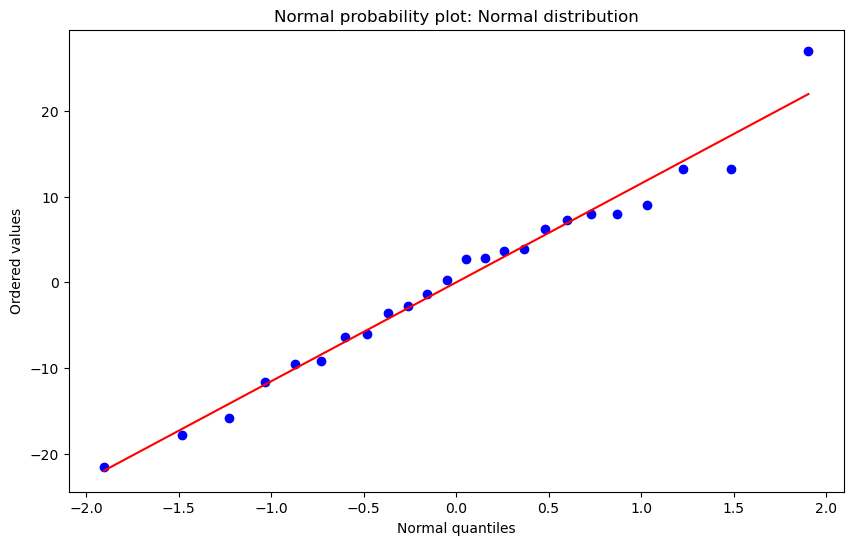

In [26]:
# your code goes here 
resid = data['Food Consumption'] - dosage_consumption_ols.predict()

# normal probability plot for the residuals
probplot(resid, plot=plt)
plt.title("Normal probability plot: Normal distribution")
plt.xlabel("Normal quantiles")
plt.ylabel("Ordered values")
plt.show()

**Your answer goes here:**


Because the blue dots follow the red line very closely, the residuals are approximately normally distributed.